
First we install gdown

In [ ]:
!pip install --upgrade --no-cache-dir gdown

Downoading the dataset

In [ ]:
!gdown 1_wSqNgJznivOOlj3xW3mErMQY4bQOc3N

Downloading...
From: https://drive.google.com/uc?id=1_wSqNgJznivOOlj3xW3mErMQY4bQOc3N
To: /content/BankChurners.csv
100% 1.51M/1.51M [00:00<00:00, 44.1MB/s]


Checking if the file was downloaded correctly - Loading the dataset


In [ ]:
import pandas as pd

data = pd.read_csv('/content/BankChurners.csv')

print(data)

       CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0      768805383  Existing Customer            45      M                3   
1      818770008  Existing Customer            49      F                5   
2      713982108  Existing Customer            51      M                3   
3      769911858  Existing Customer            40      F                4   
4      709106358  Existing Customer            40      M                3   
...          ...                ...           ...    ...              ...   
10122  772366833  Existing Customer            50      M                2   
10123  710638233  Attrited Customer            41      M                2   
10124  716506083  Attrited Customer            44      F                1   
10125  717406983  Attrited Customer            30      M                2   
10126  714337233  Attrited Customer            43      F                2   

      Education_Level Marital_Status Income_Category Card_Category  \
0    

## **Question 1**


#1.1
Cheking the headers

In [ ]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


There are 23 columns which 20 of them are features (The last two will be ignored and the first one is not counted as a feature!)

**Features are:**

In [ ]:
feature_count = 0
for column in data.columns[1:-2]: #Ignored the non-feature columns
  print(column)
  feature_count = feature_count + 1
print("\nTotal features:", feature_count)

Attrition_Flag
Customer_Age
Gender
Dependent_count
Education_Level
Marital_Status
Income_Category
Card_Category
Months_on_book
Total_Relationship_Count
Months_Inactive_12_mon
Contacts_Count_12_mon
Credit_Limit
Total_Revolving_Bal
Avg_Open_To_Buy
Total_Amt_Chng_Q4_Q1
Total_Trans_Amt
Total_Trans_Ct
Total_Ct_Chng_Q4_Q1
Avg_Utilization_Ratio

Total features: 20


Total samples

In [ ]:
print("Total sample number: ", len(data))

Total sample number:  10127


#1.2

Distribution plot for 5 features

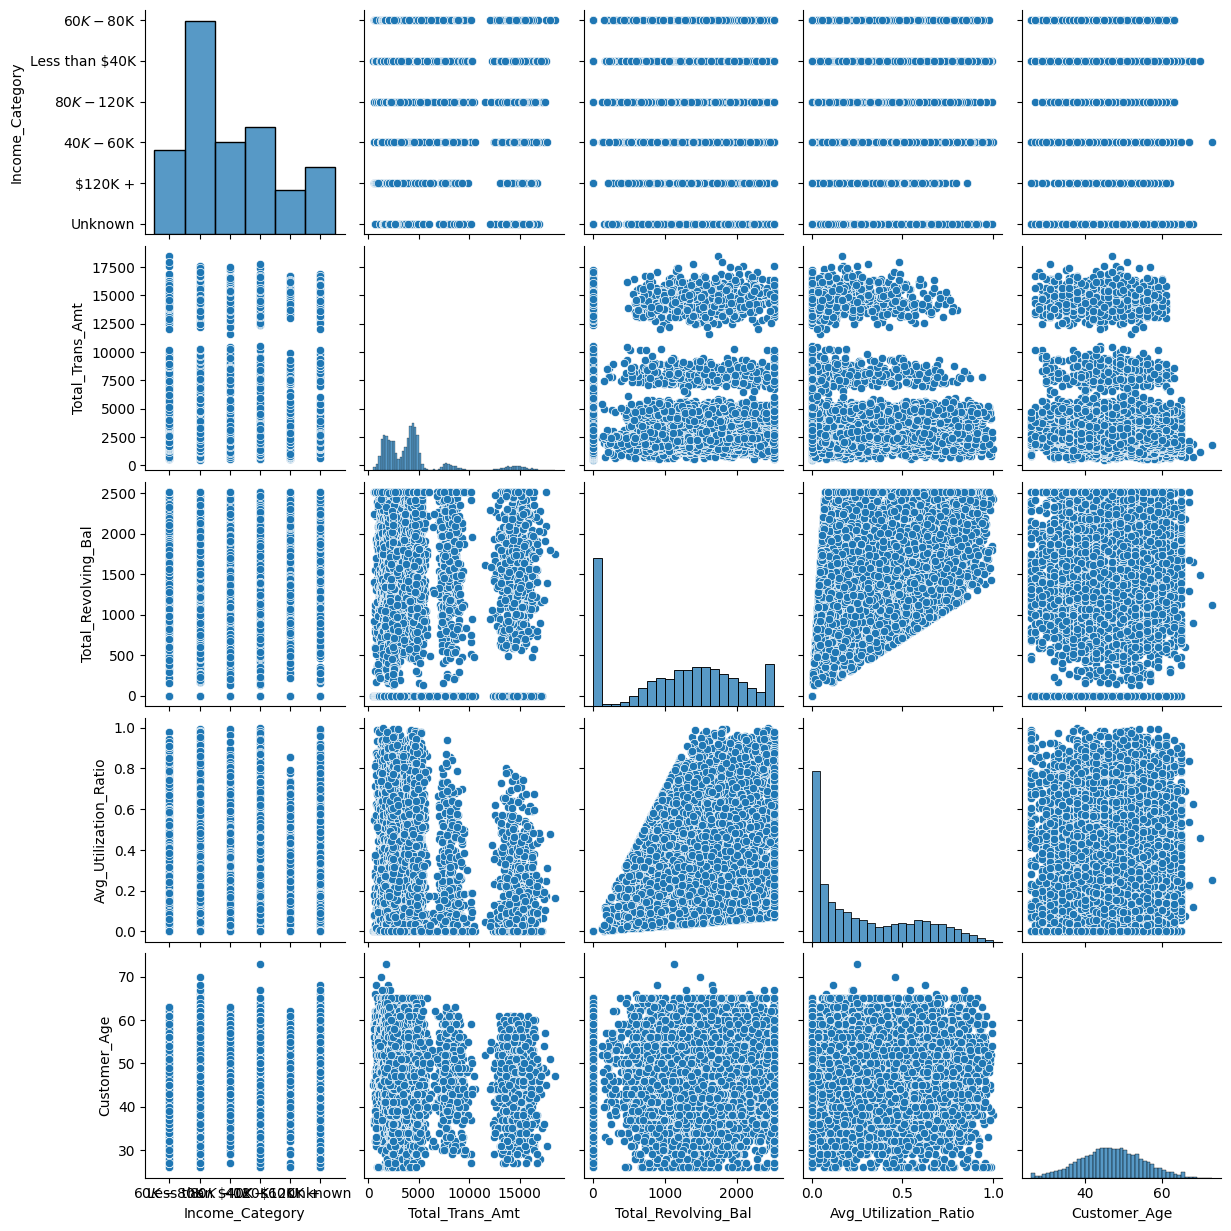

In [ ]:
import seaborn as sns

#sns.pairplot(data)
sns.pairplot(data, vars = ["Income_Category", "Total_Trans_Amt", "Total_Revolving_Bal", "Avg_Utilization_Ratio", "Customer_Age"])

#1.3

**Correlation with heatmap**



Categorical features: Gender & Martial_Status


0        1
1        0
2        1
3        0
4        1
        ..
10122    1
10123    1
10124    0
10125    1
10126    0
Name: Gender, Length: 10127, dtype: int8 0        1
1        2
2        1
3        3
4        1
        ..
10122    2
10123    0
10124    1
10125    3
10126    1
Name: Marital_Status, Length: 10127, dtype: int8


<Axes: >

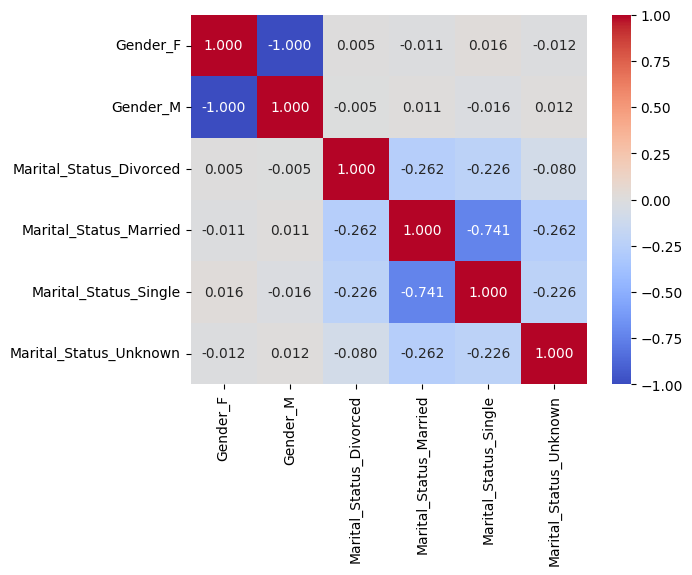

In [ ]:

# Encode categorical features using one-hot encoding
data_encoded = pd.get_dummies(data[['Gender', 'Marital_Status']])

data['Gender'] = pd.Categorical(data['Gender']).codes
data['Marital_Status'] = pd.Categorical(data['Marital_Status']).codes

print(data['Gender'], data['Marital_Status'])
# Compute the correlation matrix for the encoded categorical features
correlation_matrix = data_encoded.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".3f")



Continous features: Age & Credit_Limit

<Axes: >

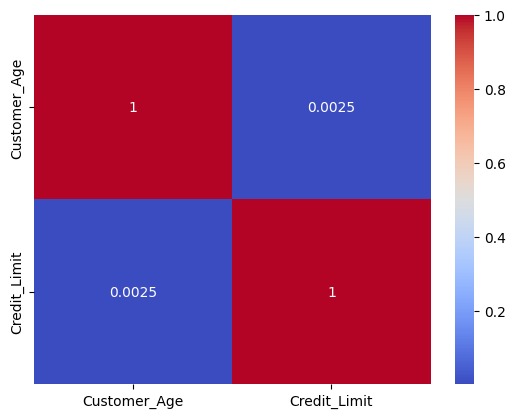

In [ ]:
# Compute the correlation matrix for the continuous features
correlation_matrix = data[['Customer_Age', 'Credit_Limit']].corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")


#1.4


Cheking for Nan in the dataset

In [ ]:
# Check for NaN values in the dataset
nan_summary = data.isna().sum()
print("Nan counts in each column:\n", nan_summary)

print("---------------------------------------------------------------------------------------------------------------------------------------")
# Display columns with NaN values, if any
nan_columns = nan_summary[nan_summary > 0]
print("Columns with NaN values:\n", nan_columns)

print("---------------------------------------------------------------------------------------------------------------------------------------")
# If there are NaN values, drop rows containing them
if nan_columns.empty:
    print("No NaN values found in the dataset.")
else:
    data_cleaned = data.dropna()
    print(f"NaN values found. Rows with NaN values removed. New dataset size: {data_cleaned.shape}")

Nan counts in each column:
 CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category     

#1.5


**Attrition_Flag Classes:**

In [ ]:
classes = data['Attrition_Flag'].unique()

class_count = len(classes)

print("Class count: \n", class_count)
print("\nClasses in 'Attrition_Flag': \n", classes)

Class count: 
 2

Classes in 'Attrition_Flag': 
 ['Existing Customer' 'Attrited Customer']


**Data Distribution:**


Data Distribution in 'Attrition_Flag': 
 Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64


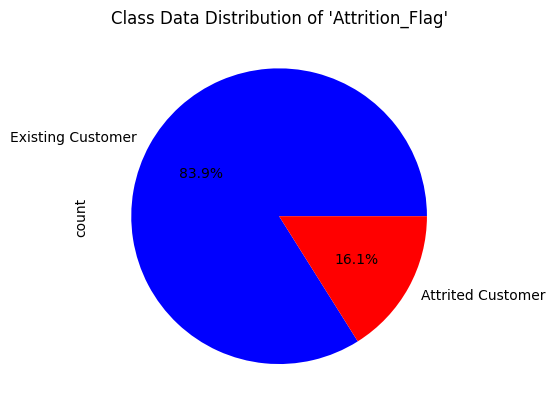

In [ ]:
data_count_in_class = data['Attrition_Flag'].value_counts()
print("\nData Distribution in 'Attrition_Flag': \n", data_count_in_class)

#Pie Plot
import matplotlib.pyplot as plt
data_count_in_class.plot(kind='pie', autopct='%1.1f%%', colors=['blue', 'red'], labels=data_count_in_class.index)
plt.title("Class Data Distribution of 'Attrition_Flag'")
plt.show()

#1.6

**Splitting the data** - train (60%), test (20%) and validation (20%)

In [ ]:
from sklearn.model_selection import train_test_split

for column in data.select_dtypes(include=["object"]).columns:
    data[column] = pd.Categorical(data[column]).codes

#print(data)

x = data.drop('Attrition_Flag', axis=1)
x = x.iloc[:, :-2]  # Exclude the last two columns from the dataset
y = data[['Attrition_Flag']].values

#print(x)

# Split data into train (60%), test (20%) and validation (20%)
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, stratify=y, random_state=13)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=13)


print("Training data shape:", x_train.shape, y_train.shape)
print("Validation data shape:", x_val.shape, y_val.shape)
print("Test data shape:", x_test.shape, y_test.shape)


Training data shape: (6076, 20) (6076, 1)
Validation data shape: (2025, 20) (2025, 1)
Test data shape: (2026, 20) (2026, 1)


**Training a logostic Regression Model** - on unbalanced data

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to contr

Training Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       976
           1       0.84      1.00      0.91      5100

    accuracy                           0.84      6076
   macro avg       0.42      0.50      0.46      6076
weighted avg       0.70      0.84      0.77      6076

Training Confusion Matrix:
 [[   0  976]
 [   0 5100]]

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       325
           1       0.84      1.00      0.91      1700

    accuracy                           0.84      2025
   macro avg       0.42      0.50      0.46      2025
weighted avg       0.70      0.84      0.77      2025

Validation Confusion Matrix:
 [[   0  325]
 [   0 1700]]


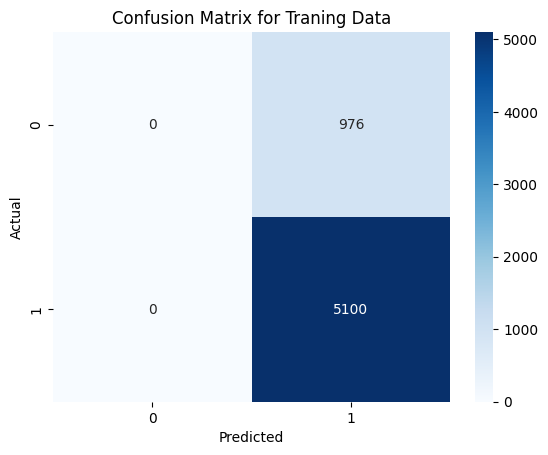

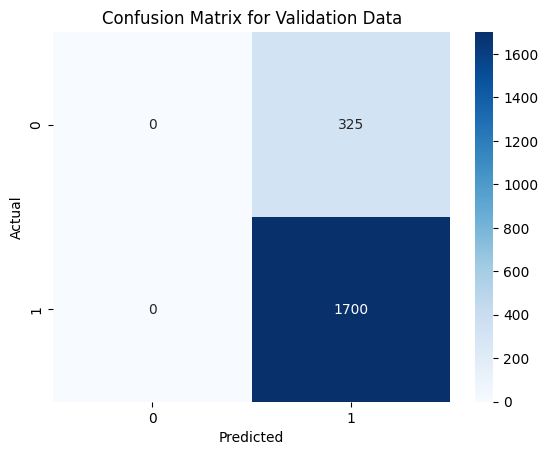

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt

# Train a Logistic Regression model
model = LogisticRegression(random_state=13, max_iter=100)
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

# Evaluate the model on training data
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluate the model on validation data
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Traning Data")
plt.show()

sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Validation Data")
plt.show()


**Training a logostic Regression Model** - on balanced data

balancing the data using random under **sampling**

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Handle class imbalance using undersampling
undersampler = RandomUnderSampler(random_state=13)
x_balanced, y_balanced = undersampler.fit_resample(x, y)

print("x balanced shape:", x_balanced.shape)
print("y balanced:", y_balanced.shape)

x balanced shape: (3254, 20)
y balanced: (3254,)


**Splitting the data** - train (60%), test (20%) and validation (20%)

In [ ]:
# Split data into train (60%), test (20%) and validation (20%)
x_train, x_temp, y_train, y_temp = train_test_split(x_balanced, y_balanced, test_size=0.4, stratify=y_balanced, random_state=13)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=13)

print("Training data shape:", x_train.shape, y_train.shape)
print("Validation data shape:", x_val.shape, y_val.shape)
print("Test data shape:", x_test.shape, y_test.shape)

Training data shape: (1952, 20) (1952,)
Validation data shape: (651, 20) (651,)
Test data shape: (651, 20) (651,)


**Training a logostic Regression Model** - on balanced data

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.68      0.69       976
           1       0.69      0.70      0.69       976

    accuracy                           0.69      1952
   macro avg       0.69      0.69      0.69      1952
weighted avg       0.69      0.69      0.69      1952

Training Confusion Matrix:
 [[660 316]
 [288 688]]

Validation Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.66      0.68       325
           1       0.68      0.71      0.70       326

    accuracy                           0.69       651
   macro avg       0.69      0.69      0.69       651
weighted avg       0.69      0.69      0.69       651

Validation Confusion Matrix:
 [[214 111]
 [ 93 233]]


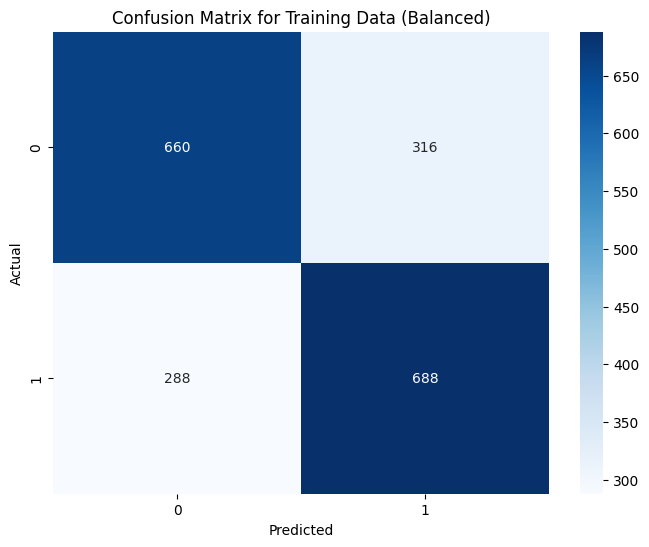

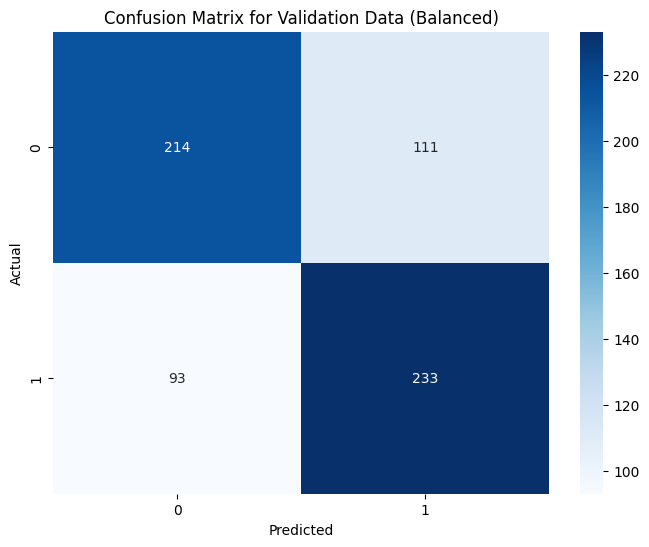

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression(random_state=42, max_iter=100)
model.fit(x_train, y_train)

# Make predictions
y_train_pred = model.predict(x_train)
y_val_pred = model.predict(x_val)

# Evaluate the model on training data
print("Training Classification Report:\n", classification_report(y_train, y_train_pred))
print("Training Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# Evaluate the model on validation data
print("\nValidation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_train, y_train_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Training Data (Balanced)")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_val, y_val_pred), annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Validation Data (Balanced)")
plt.show()